In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e10/sample_submission.csv
/kaggle/input/playground-series-s3e10/train.csv
/kaggle/input/playground-series-s3e10/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s3e10/train.csv")
real_test = pd.read_csv("/kaggle/input/playground-series-s3e10/test.csv")
samp_sub = pd.read_csv("/kaggle/input/playground-series-s3e10/sample_submission.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB


In [4]:
df["Class"].sum()
#we r trying to predict class

10967

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Mean_Integrated'}>,
        <AxesSubplot:title={'center':'SD'}>],
       [<AxesSubplot:title={'center':'EK'}>,
        <AxesSubplot:title={'center':'Skewness'}>,
        <AxesSubplot:title={'center':'Mean_DMSNR_Curve'}>],
       [<AxesSubplot:title={'center':'SD_DMSNR_Curve'}>,
        <AxesSubplot:title={'center':'EK_DMSNR_Curve'}>,
        <AxesSubplot:title={'center':'Skewness_DMSNR_Curve'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

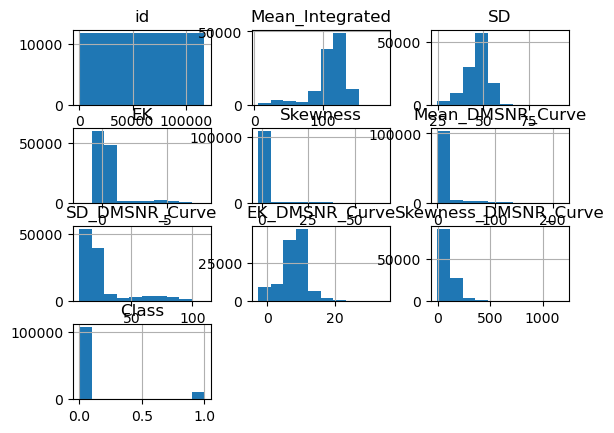

In [5]:
df.hist()

In [6]:
real_test 
# what we are trying to predict

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
1,117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
2,117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
3,117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
4,117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775
...,...,...,...,...,...,...,...,...,...
78372,195936,119.328125,46.449223,0.227636,0.161986,1.120401,13.883072,14.153556,213.485463
78373,195937,125.835938,43.986678,0.078460,0.077917,2.342809,13.008583,9.907167,136.815454
78374,195938,131.789062,43.493074,0.049140,0.402859,2.116221,14.639555,10.898768,147.929016
78375,195939,79.476562,42.579993,0.817383,1.818474,1.903010,15.844982,10.723755,143.273847


In [7]:
from sklearn.metrics import log_loss 


In [8]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42)

In [10]:
X_train

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
70818,70818,127.257812,46.640114,-0.076570,-0.072931,3.673077,24.834040,7.740922,62.786255
11479,11479,129.304688,50.845459,-0.082341,-0.038894,1.167224,12.859284,13.221365,201.668757
63940,63940,120.304688,52.927757,0.056809,-0.396938,1.261706,11.647461,13.620135,236.316140
446,446,121.914062,52.102040,-0.075395,-0.395776,1.623746,15.097244,11.569182,147.139615
37856,37856,103.859375,47.391946,0.390330,0.287747,2.659699,16.111799,8.452671,86.408502
...,...,...,...,...,...,...,...,...,...
76820,76820,111.679688,47.929430,0.516412,0.581796,2.973244,18.958161,8.042284,73.163688
110268,110268,97.718750,49.695626,0.493286,0.174874,0.990803,10.469512,15.938185,308.955388
103694,103694,121.929688,50.890363,0.282531,-0.209978,3.681438,25.070439,7.236288,54.079476
860,860,101.242188,50.496838,0.464908,0.134085,4.157191,26.057511,6.585016,43.935780


In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
log_loss(y_test,y_pred)

0.7663571975899011

In [12]:
from sklearn import tree
tr = tree.DecisionTreeClassifier()
tr = tr.fit(X_train, y_train)
y_pred = tr.predict(X_test)
log_loss(y_test,y_pred)

0.5447636469581418

In [13]:
sub  =  tr.predict(real_test)

In [14]:
sub = pd.DataFrame(sub )

In [15]:
sub.set_axis(["Class"],axis=1,inplace=True)

In [16]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   78377 non-null  int64
dtypes: int64(1)
memory usage: 612.4 KB


In [17]:
real_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78377 non-null  int64  
 1   Mean_Integrated       78377 non-null  float64
 2   SD                    78377 non-null  float64
 3   EK                    78377 non-null  float64
 4   Skewness              78377 non-null  float64
 5   Mean_DMSNR_Curve      78377 non-null  float64
 6   SD_DMSNR_Curve        78377 non-null  float64
 7   EK_DMSNR_Curve        78377 non-null  float64
 8   Skewness_DMSNR_Curve  78377 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 5.4 MB


In [18]:
real_sub = real_test["id"]
real_sub = pd.DataFrame(real_sub)
real_sub = real_sub.join(sub)

In [19]:
real_sub.to_csv("submission.csv", index =False)

In [20]:
real_sub

,id,Class
0,117564,0
1,117565,0
2,117566,0
3,117567,0
4,117568,0
...,...,...
78372,195936,0
78373,195937,0
78374,195938,0
78375,195939,0
